# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

[0.49887798428336055, 0.18799115490560184, 0.830135841350553, 1.0027334389886111, 0.9944468934228347, 0.9812313753936915, -0.06053743767747146, 0.921495445638832, 0.9440389925123096, -0.09660747269581009, 0.8625230152094593, 0.03289854196855428, 0.47106523452980215]
70.95987126384676
0


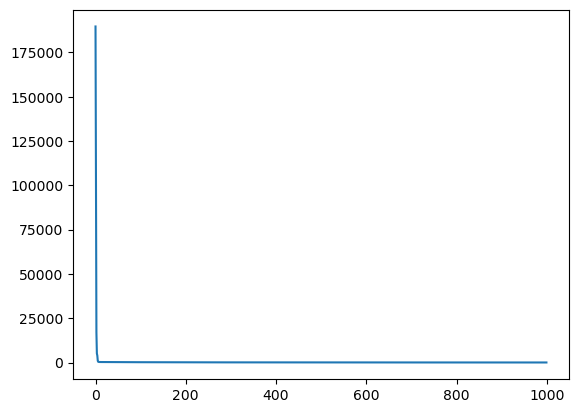

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
arr = np.genfromtxt('data/Boston.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')
Y_Train = arr["MEDV"]
fields = list(arr.dtype.names)
fields.remove('MEDV')
X_Train = arr[fields]
calculated_costs = []

wList = [1 for i in range(len(fields))]
b = 0
a = 0.00001
def model(wList, fields, xValues, b):
    answer = b
    for i in range(len(wList)):
        answer += wList[i] * xValues[fields[i]]
    return answer

def calcWeights(wList, X_Train, Y_Train, fields, b, a):
    newWList = wList
    for i in range(len(wList)):
        derW = 0
        for j, value in enumerate(X_Train[fields[i]]):
            xj = X_Train[j]
            pred = model(wList, fields, xj, b)
            err = pred - Y_Train[j]
            derW += err * value

        derW /= len(X_Train[fields[i]])
        newWList[i] = newWList[i] - a*derW

    derB = 0
    for j, value in enumerate(X_Train):
        derB += model(wList, fields, value, b) - Y_Train[j]

    derB /= len(X_Train)
    b = b - a*derB
    return (newWList, b)
def costFunc(wList, X_Train, Y_Train, fields, b):
    m = X_Train.shape[0]
    answer = 0
    for j, value in enumerate(X_Train):
        answer += (model(wList, fields, value, b) - Y_Train[j]) ** 2
    answer /= 2*m
    return answer

def main(wList, X_Train, Y_Train, fields, b, a):
    iterations = 1000
    for i in range(iterations):
        iteration = calcWeights(wList, X_Train, Y_Train, fields, b, a)
        wList, b = iteration
        calculated_costs.append(costFunc(wList, X_Train, Y_Train, fields, b))



main(wList, X_Train, Y_Train, fields, b, a)
plt.plot(calculated_costs)
print(wList)
print(calculated_costs[-1])
print(b)
